# MODS206 - Data analysis in economics 2 - Applied Econometrics

### Authors:
* **João Lucas Furtado Melga**
* **Leonardo Hannas de Carvalho Santos**
* **Yuri de Sene Alvizi** 

---
## Imports of the the useful packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [2]:
!pip install arrow

---
## Exploratory data analysis

We first load the main dataset `traffic`.

In [3]:
traffic = pd.read_feather('codedDataset/trafficDataset.feather')
traffic

,city,station,weather,dow,datetime,hour,speed,vehicleType,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
0,1,1,3,4,2021-04-01,0,31,2,9.35676,1,False,False
1,1,1,3,4,2021-04-01,0,38,2,8.35296,1,False,False
2,1,1,3,4,2021-04-01,0,29,3,11.29870,1,False,False
3,1,1,3,4,2021-04-01,0,42,1,6.56640,1,False,False
4,1,1,3,4,2021-04-01,0,41,2,7.99116,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
43952647,6,10,1,6,2021-07-31,0,40,1,6.75600,3,False,False
43952648,6,10,1,6,2021-07-31,0,48,2,7.30656,3,False,False
43952649,6,10,1,6,2021-07-31,0,43,2,7.77276,3,False,False
43952650,6,10,1,6,2021-07-31,0,44,3,8.94880,3,False,False


We now extract some useful statistics from the dataset. Namely, the mean and standard deviation, represented by the datasets `df_mean` and `df_std`, respectively.

In [4]:
df_mean = traffic.groupby('city').mean().drop(columns=['station', 'weather', 'dow', 'vehicleType', 'hour'])
df_mean

,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
city,,,,,
1,33.383528,9.552725,2.948498,0.002468,0.000330
2,39.501495,8.566721,2.975273,0.002963,0.000398
3,39.501675,8.566848,2.471608,0.002382,0.000325
4,39.501333,8.565293,1.180170,0.001197,0.000123
5,39.510016,8.566635,1.000000,0.000999,0.000145
6,39.497612,8.567330,2.917976,0.002884,0.000378


In [5]:
df_std = traffic.groupby('city').std().drop(columns=['station', 'weather', 'dow', 'vehicleType', 'hour'])
df_std

,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
city,,,,,
1,8.901254,2.098720,0.282210,0.049620,0.018166
2,5.007999,1.506273,0.185971,0.054357,0.019949
3,5.008598,1.506875,0.782969,0.048743,0.018024
4,5.009140,1.505781,0.384329,0.034576,0.011108
5,5.007146,1.506842,0.000000,0.031594,0.012061
6,5.008756,1.506719,0.349471,0.053624,0.019439


From the dataframe above, `df_std`, we see that the standard deviation of the speed of the **city 1** is higher. We will investigate it.

To that, we will load another dataset, the `city_info` dataset, shown below. 

In [6]:
city_info = pd.read_csv('info/cityInfo.csv')
city_info.columns = ['city', 'size', 'population', 'popDensity', 'cityName']
city_info

,city,size,population,popDensity,cityName
0,1,192,379909,1978.692708,Azzurropoli
1,2,91,453991,4988.912088,Biancavilla
2,3,363,271008,746.578512,Lavandonia
3,4,454,152110,335.044053,Celestopoli
4,5,394,52620,133.553299,Plumbeopoli
5,6,183,303659,1659.338798,Aranciopoli


Then, we merge the `df_mean` and the `city_info` datasets into the final dataset `cities`.

In [7]:
cities = df_mean.merge(city_info, on='city')
cities

,city,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath,size,population,popDensity,cityName
0,1,33.383528,9.552725,2.948498,0.002468,0.000330,192,379909,1978.692708,Azzurropoli
1,2,39.501495,8.566721,2.975273,0.002963,0.000398,91,453991,4988.912088,Biancavilla
2,3,39.501675,8.566848,2.471608,0.002382,0.000325,363,271008,746.578512,Lavandonia
3,4,39.501333,8.565293,1.180170,0.001197,0.000123,454,152110,335.044053,Celestopoli
4,5,39.510016,8.566635,1.000000,0.000999,0.000145,394,52620,133.553299,Plumbeopoli
5,6,39.497612,8.567330,2.917976,0.002884,0.000378,183,303659,1659.338798,Aranciopoli


Now, a *heatmap* of the correlation matrix of the `cities` dataset is shown.

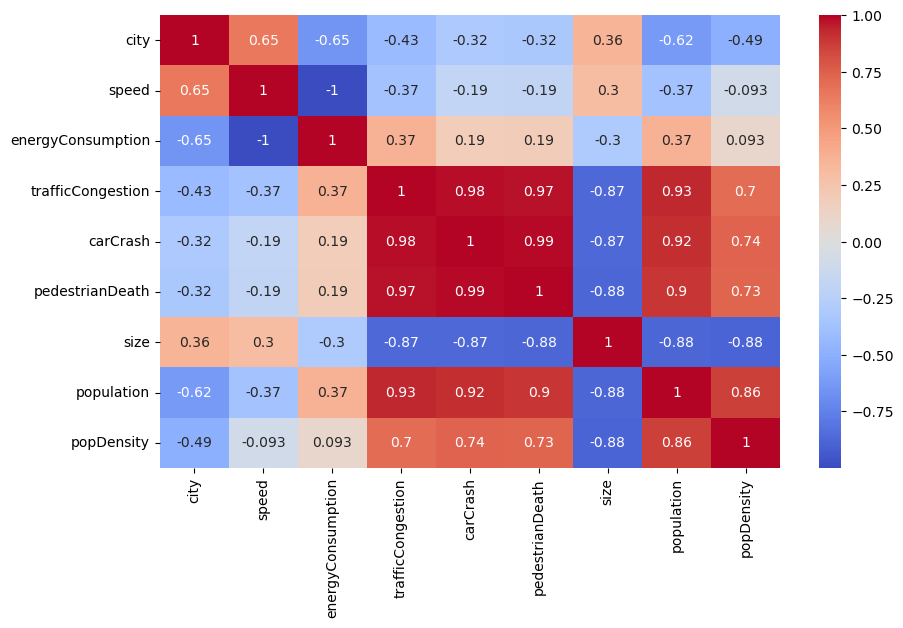

In [8]:
plt.figure(figsize=(10, 6), dpi=100)
sns.heatmap(cities.corr(), cmap='coolwarm', annot=True)
plt.show()

Since that we have constated that the standard deviation of the speed of the **city 1** is higher by checking the `df_std` dataset, we will grab the `traffic` dataset and perform a *groupby* operation, using the *day* as criteria to group the data. Then, we calculate the mean of the resulting data. The final result is stored in the `city_1` dataset. 

In [9]:
city_1 = traffic[traffic['city'] == 1].groupby(pd.Grouper(key='datetime', freq='D')).mean().drop(columns=['city', 'station', 'weather', 'dow', 'vehicleType', 'hour'])
city_1

,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
datetime,,,,,
2021-04-01,39.502444,8.563826,2.920885,0.002989,0.000338
2021-04-02,39.480170,8.570519,2.920581,0.002975,0.000489
2021-04-03,39.523594,8.556730,3.000000,0.003190,0.000479
2021-04-04,39.476120,8.568096,3.000000,0.003345,0.000368
2021-04-05,39.520970,8.565371,2.930426,0.002663,0.000334
...,...,...,...,...,...
2021-07-27,27.183649,10.555001,2.922449,0.002161,0.000259
2021-07-28,27.180771,10.558136,2.939915,0.002183,0.000258
2021-07-29,27.214167,10.553890,2.920430,0.001874,0.000272


Since we have perceived a clear **change in the parttern of both the speed and the energy consumption values according to the time**, we will plot this data, as well as the car crash data versus the time.

<Figure size 1000x600 with 0 Axes>

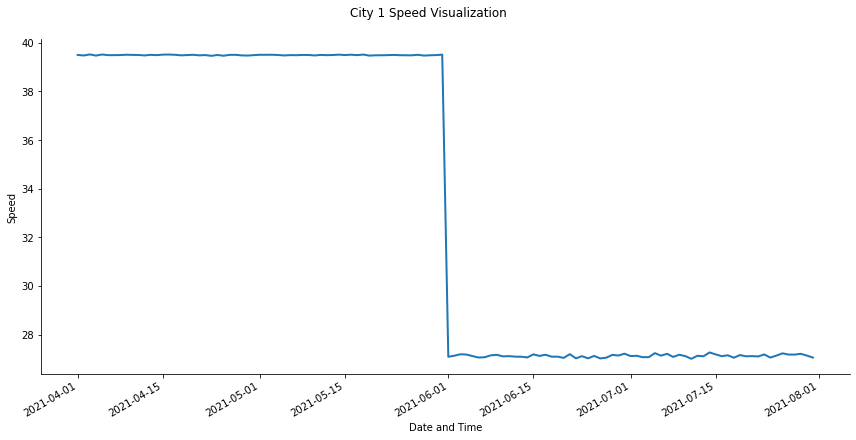

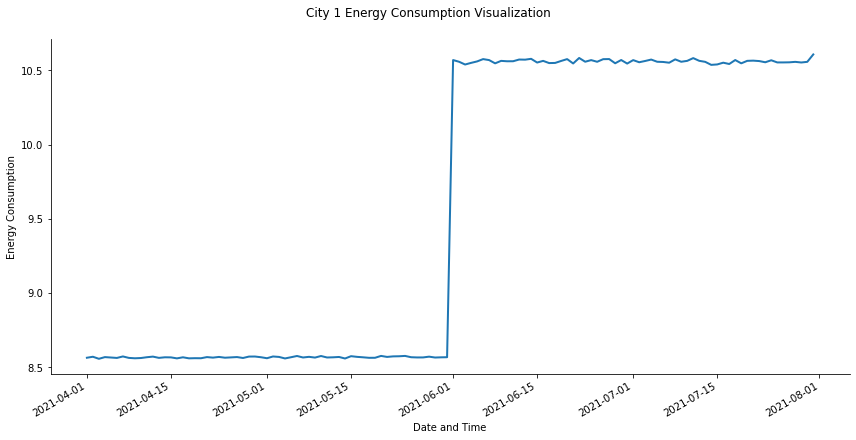

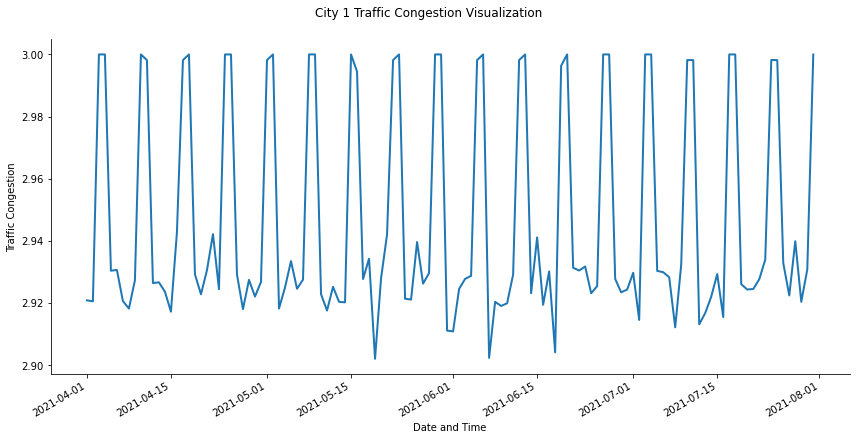

In [10]:
# City data visualization 
plt.figure(figsize=(10, 6), dpi=100)

# Speed vs Day
g1 = sns.relplot(x='datetime', y='speed', kind='line', data=city_1, height=6, aspect=2, linewidth=2)
g1.figure.autofmt_xdate() 
g1.set_xlabels('Date and Time')
g1.set_ylabels('Speed')
g1.figure.suptitle('City 1 Speed Visualization', y=1.05)

# Energy consumption vs Day
g2 = sns.relplot(x='datetime', y='energyConsumption', kind='line', data=city_1, height=6, aspect=2, linewidth=2)
g2.figure.autofmt_xdate()
g2.set_xlabels('Date and Time')
g2.set_ylabels('Energy Consumption')
g2.figure.suptitle('City 1 Energy Consumption Visualization', y=1.05)

# Traffic congestion vs Day
g3 = sns.relplot(x='datetime', y='trafficCongestion', kind='line', data=city_1, height=6, aspect=2, linewidth=2)
g3.figure.autofmt_xdate()
g3.set_xlabels('Date and Time')
g3.set_ylabels('Traffic Congestion')
g3.figure.suptitle('City 1 Traffic Congestion Visualization', y=1.05)

plt.show()

Now, we can see how this change of behavior in the **city 1** is represented when we perform an analysis in **each station of this city**. To do this, we will group the data by the *station* and the *day* and calculate the mean of the resulting data. The final result is stored in the `stations_city_1_mean` dataset.

In [11]:
stations_city_1_mean = traffic[traffic['city'] == 1].groupby(['station', pd.Grouper(key='datetime', freq='D')]).mean().drop(columns=['city', 'weather', 'dow', 'vehicleType', 'hour'])
stations_city_1_mean

speed  energyConsumption  trafficCongestion  carCrash  \
station datetime                                                                
1       2021-04-01  39.421352           8.586321           2.884873  0.003347   
        2021-04-02  39.434616           8.586430           2.772947  0.002332   
        2021-04-03  39.523284           8.562825           3.000000  0.003175   
        2021-04-04  39.538990           8.565154           3.000000  0.002136   
        2021-04-05  39.525909           8.564945           2.880901  0.003455   
...                       ...                ...                ...       ...   
10      2021-07-27  24.478435          10.987449           2.911271  0.002059   
        2021-07-28  24.520537          11.008755           2.912668  0.001830   
        2021-07-29  24.420923          10.987493           2.919844  0.001336   
        2021-07-30  24.469350          10.965828           2.930280  0.002156   
        2021-07-31  24.422000          11.069551           3.000000  0.002000   

                    pedestrianDeath  
station datetime                     
1       2021-04-01         0.000335  
        2021-04-02         0.000833  
        2021-04-03         0.000454  
        2021-04-04         0.000610  
        2021-04-05         0.000329  
...                             ...  
10      2021-07-27         0.000206  
        2021-07-28         0.000102  
        2021-07-29         0.000308  
        2021-07-30         0.000308  
        2021-07-31         0.000000  

[1220 rows x 5 columns]

We proceed similarly, but now we compute the standard deviation of the resulting data of the city 1. The final result is stored in the `stations_city_1_std` dataset.

In [12]:
stations_city_1_std =  traffic[traffic['city'] == 1].groupby(['station']).std().drop(columns=['city', 'weather', 'dow', 'vehicleType', 'hour'])
stations_city_1_std

,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
station,,,,,
1,9.003540,2.146350,0.408904,0.048072,0.017546
2,9.001536,2.148230,0.227418,0.048783,0.017631
3,9.007192,2.146495,0.220044,0.049049,0.017638
4,5.006400,1.506766,0.224130,0.053505,0.020232
5,9.008465,2.146914,0.298202,0.048956,0.017982
6,9.005037,2.146676,0.300439,0.047905,0.017916
7,5.004583,1.506096,0.414765,0.053696,0.019105
8,8.997093,2.145184,0.229075,0.048943,0.017961
9,9.009863,2.149017,0.236556,0.048882,0.017694


From the dataset above, `stations_city_1_std`, we see that **the stations 4 and 7 have lower speed standard deviations**. To visualize it, we will plot the values of the mean of the speed in the city 1, for each station, versus the time.

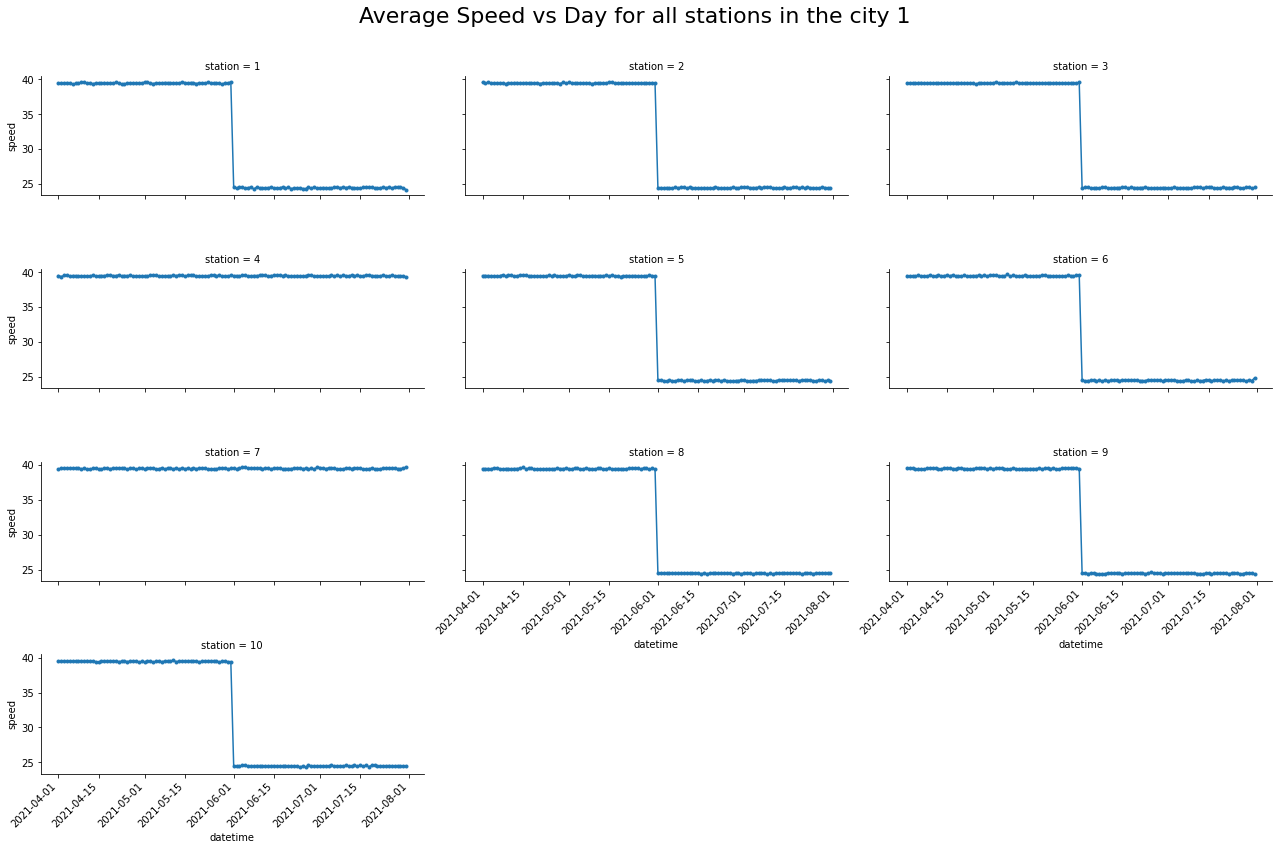

In [13]:
# Average speed vs Day for each station in the city 1
g = sns.FacetGrid(stations_city_1_mean.reset_index(), col="station", col_wrap=3, height=3, aspect=2)
g = g.map(plt.plot, "datetime", "speed", marker=".")

# Rotation of the x-axis labels for better visibility
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()

g.figure.suptitle("Average Speed vs Day for all stations in the city 1", size=22)
plt.subplots_adjust(top=0.9)

plt.show()

From the plot above, we see that **only the stations 4 and 7 did not present any significant change in the average speed values** through the days. This justifies their lower values in the standard deviation.

Now, since we have detected this particular behavior in the city 1, we will perform a macro analysis, considering all the cities. we start by visualizing the average speed by city versus the date.

In [14]:
cities

,city,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath,size,population,popDensity,cityName
0,1,33.383528,9.552725,2.948498,0.002468,0.000330,192,379909,1978.692708,Azzurropoli
1,2,39.501495,8.566721,2.975273,0.002963,0.000398,91,453991,4988.912088,Biancavilla
2,3,39.501675,8.566848,2.471608,0.002382,0.000325,363,271008,746.578512,Lavandonia
3,4,39.501333,8.565293,1.180170,0.001197,0.000123,454,152110,335.044053,Celestopoli
4,5,39.510016,8.566635,1.000000,0.000999,0.000145,394,52620,133.553299,Plumbeopoli
5,6,39.497612,8.567330,2.917976,0.002884,0.000378,183,303659,1659.338798,Aranciopoli


In [15]:
cities_df = traffic.drop(columns=['station', 'weather', 'dow', 'hour','vehicleType'])
cities_df = cities_df.groupby(['city', pd.Grouper(key='datetime', freq='W')]).mean().reset_index()
cities_df

,city,datetime,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
0,1,2021-04-04,39.495906,8.564603,2.963678,0.003137,0.000419
1,1,2021-04-11,39.503432,8.564683,2.948991,0.002724,0.000380
2,1,2021-04-18,39.501621,8.564766,2.950327,0.002897,0.000376
3,1,2021-04-25,39.489103,8.564850,2.952302,0.003017,0.000404
4,1,2021-05-02,39.498783,8.567746,2.948626,0.002862,0.000386
...,...,...,...,...,...,...,...
103,6,2021-07-04,39.507829,8.567501,2.920234,0.002918,0.000391
104,6,2021-07-11,39.500683,8.563735,2.919845,0.002839,0.000404
105,6,2021-07-18,39.492143,8.566217,2.917698,0.002932,0.000388
106,6,2021-07-25,39.505150,8.568339,2.920081,0.002852,0.000376


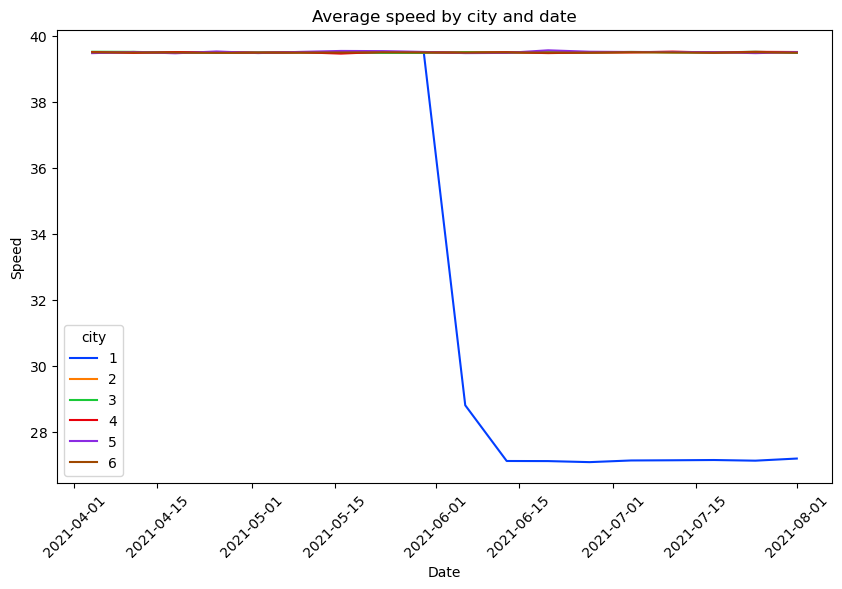

In [16]:
speed_cities = cities_df.copy()
plt.figure(figsize=(10, 6), dpi=100)
sns.lineplot(x='datetime', y='speed', hue='city', data=speed_cities, palette='bright')
plt.title("Average speed by city and date")
plt.ylabel("Speed")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()

Now we investigate the average car crash by city versus the date.

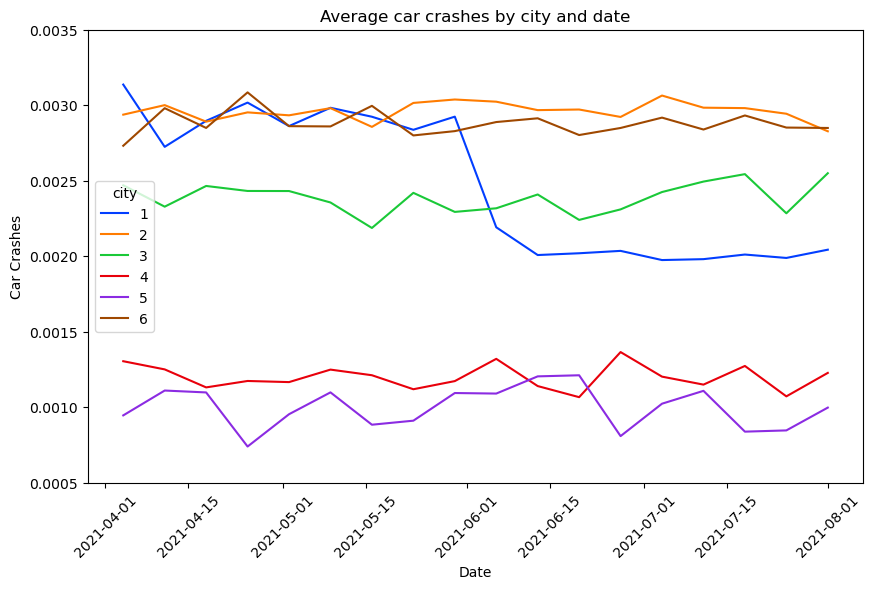

In [17]:
car_crash_cities = cities_df.copy()

plt.figure(figsize=(10, 6), dpi=100)
sns.lineplot(x='datetime', y='carCrash', hue='city', data=car_crash_cities, palette='bright')
plt.title("Average car crashes by city and date")
plt.ylabel("Car Crashes")
plt.xlabel("Date")
plt.ylim(0.0005, 0.0035)
plt.xticks(rotation=45)
plt.show()


Now we compute the average pedestrian deaths by city and date.

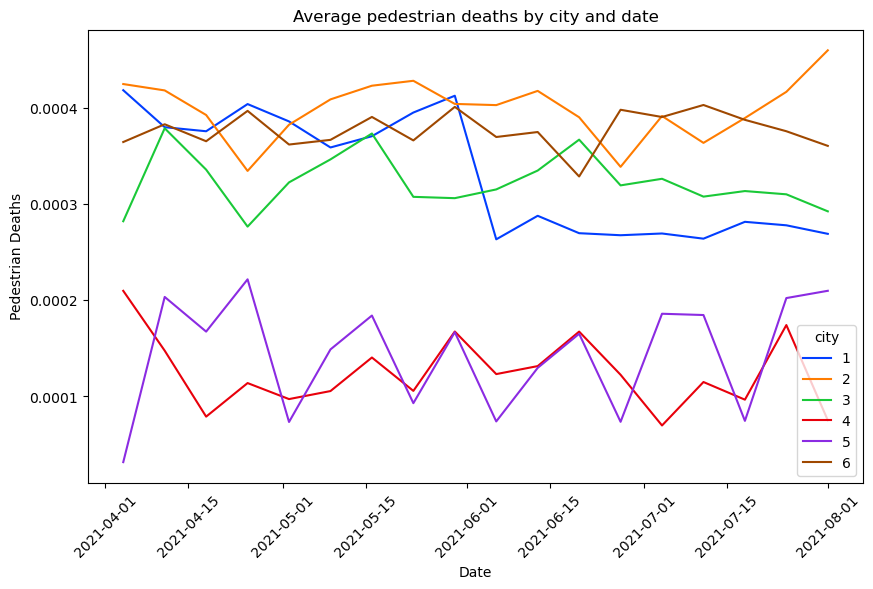

In [18]:
pedestrian_death_cities = cities_df.copy()

# groupby(['city', pd.Grouper(key='datetime', freq='W')]).mean().reset_index()

plt.figure(figsize=(10, 6), dpi=100)
sns.lineplot(x='datetime', y='pedestrianDeath', hue='city', data=pedestrian_death_cities, palette='bright')
plt.title("Average pedestrian deaths by city and date")
plt.ylabel("Pedestrian Deaths")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()

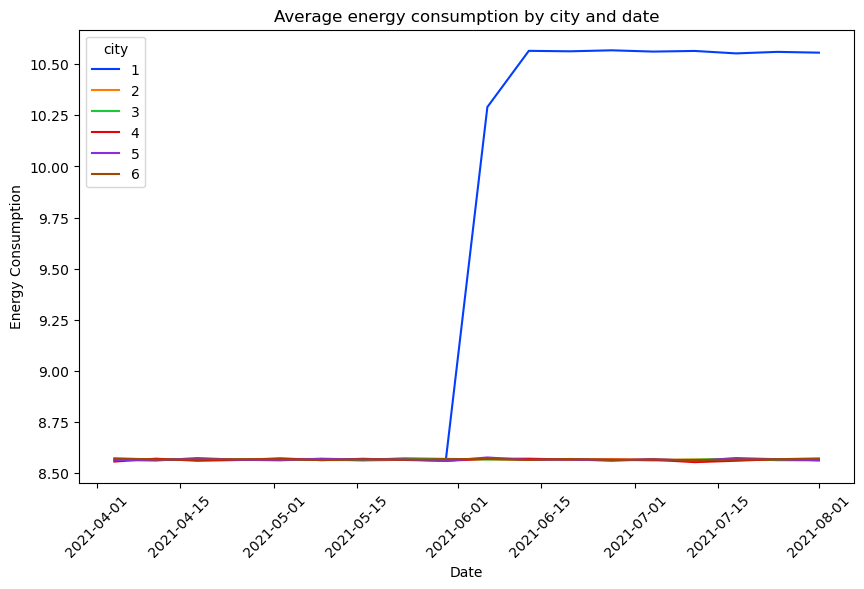

In [19]:
energy_consumption_cities = cities_df.copy()

# groupby(['city', pd.Grouper(key='datetime', freq='W')]).mean().reset_index()

plt.figure(figsize=(10, 6), dpi=100)
sns.lineplot(x='datetime', y='energyConsumption', hue='city', data=energy_consumption_cities, palette='bright')
plt.title("Average energy consumption by city and date")
plt.ylabel("Energy Consumption")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()

We now analyse the average traffic congestion by city and date.

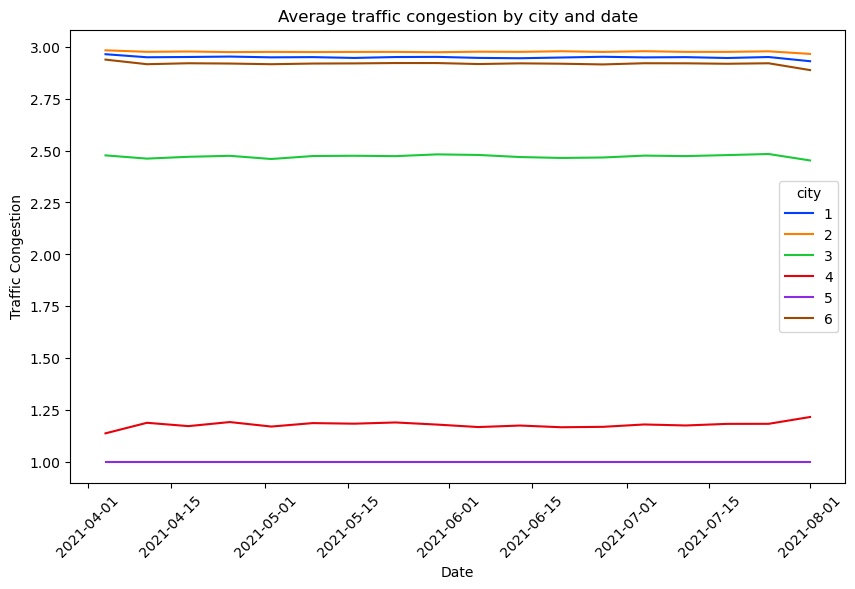

In [20]:
traffic_congestion_cities = cities_df.copy()

plt.figure(figsize=(10, 6), dpi=100)
sns.lineplot(x='datetime', y='trafficCongestion', hue='city', data=energy_consumption_cities, palette='bright')
plt.title("Average traffic congestion by city and date")
plt.ylabel("Traffic Congestion")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.show()

We end this exploratory analysis by studying the demographic data of the cities. We start by loading the `city_info` dataset.

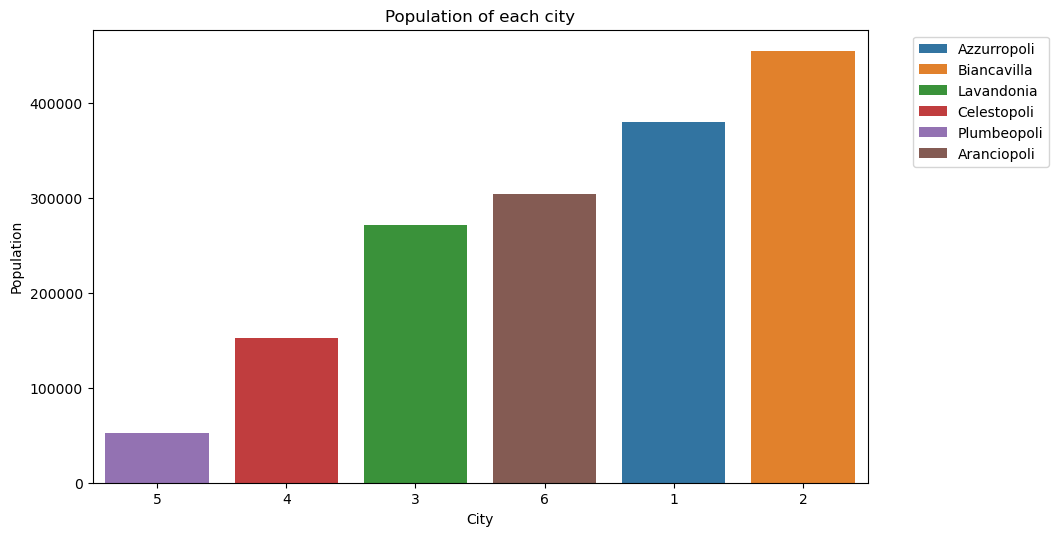

In [21]:
city_info_sorted = city_info.sort_values('population', ascending=True)

plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(x='city', y='population', hue='cityName', data=city_info, order=city_info_sorted.city, dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Population of each city")
plt.ylabel("Population")
plt.xlabel("City")
plt.show()

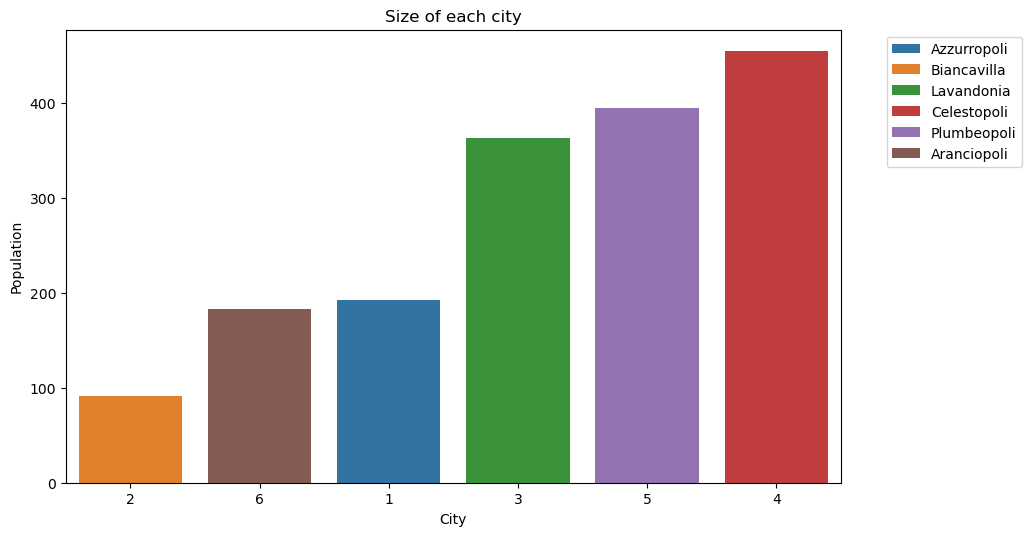

In [22]:
city_info_sorted = city_info.sort_values('size', ascending=True)

plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(x='city', y='size', hue='cityName', data=city_info, order=city_info_sorted.city, dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Size of each city")
plt.ylabel("Population")
plt.xlabel("City")
plt.show()

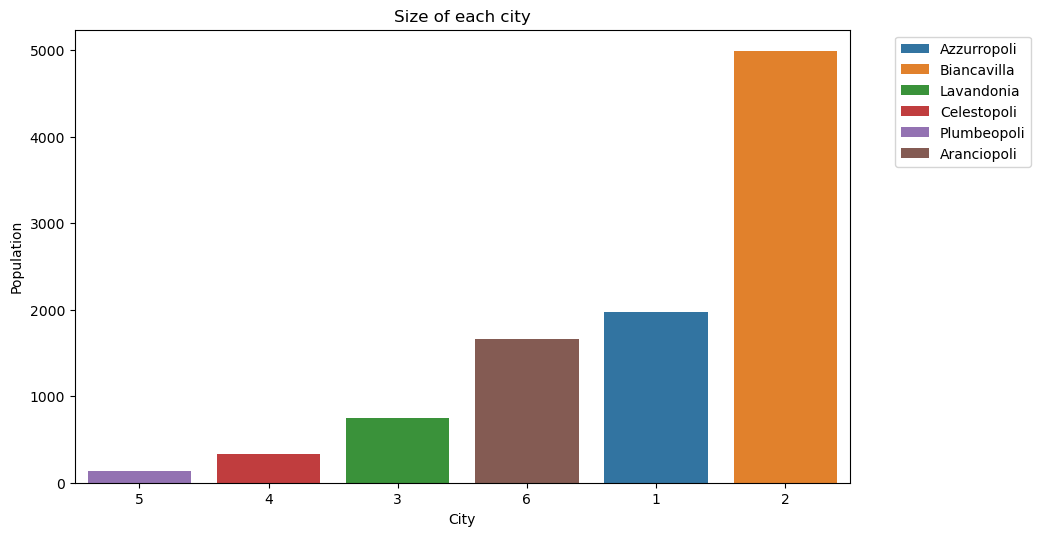

In [23]:
city_info_sorted = city_info.sort_values('popDensity', ascending=True)

plt.figure(figsize=(10, 6), dpi=100)
sns.barplot(x='city', y='popDensity', hue='cityName', data=city_info, order=city_info_sorted.city, dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Size of each city")
plt.ylabel("Population")
plt.xlabel("City")
plt.show()

---
## Regression analysis ? ? ?

In [24]:
city_1

,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
datetime,,,,,
2021-04-01,39.502444,8.563826,2.920885,0.002989,0.000338
2021-04-02,39.480170,8.570519,2.920581,0.002975,0.000489
2021-04-03,39.523594,8.556730,3.000000,0.003190,0.000479
2021-04-04,39.476120,8.568096,3.000000,0.003345,0.000368
2021-04-05,39.520970,8.565371,2.930426,0.002663,0.000334
...,...,...,...,...,...
2021-07-27,27.183649,10.555001,2.922449,0.002161,0.000259
2021-07-28,27.180771,10.558136,2.939915,0.002183,0.000258
2021-07-29,27.214167,10.553890,2.920430,0.001874,0.000272


In [25]:
stations_city_1 = stations_city_1_mean.reset_index()
stations_city_1

,station,datetime,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
0,1,2021-04-01,39.421352,8.586321,2.884873,0.003347,0.000335
1,1,2021-04-02,39.434616,8.586430,2.772947,0.002332,0.000833
2,1,2021-04-03,39.523284,8.562825,3.000000,0.003175,0.000454
3,1,2021-04-04,39.538990,8.565154,3.000000,0.002136,0.000610
4,1,2021-04-05,39.525909,8.564945,2.880901,0.003455,0.000329
...,...,...,...,...,...,...,...
1215,10,2021-07-27,24.478435,10.987449,2.911271,0.002059,0.000206
1216,10,2021-07-28,24.520537,11.008755,2.912668,0.001830,0.000102
1217,10,2021-07-29,24.420923,10.987493,2.919844,0.001336,0.000308
1218,10,2021-07-30,24.469350,10.965828,2.930280,0.002156,0.000308


In [26]:
# Stations 4 and 7 of the city 1
unchanged_stations_city_1 = stations_city_1.loc[stations_city_1['station'].isin([4,7])].reset_index(drop=True)
unchanged_stations_city_1

,station,datetime,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
0,4,2021-04-01,39.520173,8.570128,2.943457,0.002356,0.000196
1,4,2021-04-02,39.374095,8.579193,2.952847,0.002837,0.000489
2,4,2021-04-03,39.530500,8.555673,3.000000,0.003750,0.000500
3,4,2021-04-04,39.533917,8.558125,3.000000,0.004000,0.000500
4,4,2021-04-05,39.427184,8.582481,2.969688,0.002040,0.000389
...,...,...,...,...,...,...,...
239,7,2021-07-27,39.532740,8.545614,2.855237,0.002607,0.000460
240,7,2021-07-28,39.487380,8.565759,2.881150,0.003035,0.000479
241,7,2021-07-29,39.474633,8.594355,2.890353,0.003180,0.000303
242,7,2021-07-30,39.537847,8.519576,2.883743,0.002555,0.000160


In [27]:
# Stations 1, 2, 3, 5, 6, 8, 9 and 10 of the city 1
changed_stations_city_1 = stations_city_1.loc[~stations_city_1['station'].isin([4,7])].reset_index(drop=True)
changed_stations_city_1

,station,datetime,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
0,1,2021-04-01,39.421352,8.586321,2.884873,0.003347,0.000335
1,1,2021-04-02,39.434616,8.586430,2.772947,0.002332,0.000833
2,1,2021-04-03,39.523284,8.562825,3.000000,0.003175,0.000454
3,1,2021-04-04,39.538990,8.565154,3.000000,0.002136,0.000610
4,1,2021-04-05,39.525909,8.564945,2.880901,0.003455,0.000329
...,...,...,...,...,...,...,...
971,10,2021-07-27,24.478435,10.987449,2.911271,0.002059,0.000206
972,10,2021-07-28,24.520537,11.008755,2.912668,0.001830,0.000102
973,10,2021-07-29,24.420923,10.987493,2.919844,0.001336,0.000308
974,10,2021-07-30,24.469350,10.965828,2.930280,0.002156,0.000308


---
## Differences-in-Differences

In [28]:
stations_city_1_mean

speed  energyConsumption  trafficCongestion  carCrash  \
station datetime                                                                
1       2021-04-01  39.421352           8.586321           2.884873  0.003347   
        2021-04-02  39.434616           8.586430           2.772947  0.002332   
        2021-04-03  39.523284           8.562825           3.000000  0.003175   
        2021-04-04  39.538990           8.565154           3.000000  0.002136   
        2021-04-05  39.525909           8.564945           2.880901  0.003455   
...                       ...                ...                ...       ...   
10      2021-07-27  24.478435          10.987449           2.911271  0.002059   
        2021-07-28  24.520537          11.008755           2.912668  0.001830   
        2021-07-29  24.420923          10.987493           2.919844  0.001336   
        2021-07-30  24.469350          10.965828           2.930280  0.002156   
        2021-07-31  24.422000          11.069551           3.000000  0.002000   

                    pedestrianDeath  
station datetime                     
1       2021-04-01         0.000335  
        2021-04-02         0.000833  
        2021-04-03         0.000454  
        2021-04-04         0.000610  
        2021-04-05         0.000329  
...                             ...  
10      2021-07-27         0.000206  
        2021-07-28         0.000102  
        2021-07-29         0.000308  
        2021-07-30         0.000308  
        2021-07-31         0.000000  

[1220 rows x 5 columns]

In [29]:
stations_city_1

,station,datetime,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
0,1,2021-04-01,39.421352,8.586321,2.884873,0.003347,0.000335
1,1,2021-04-02,39.434616,8.586430,2.772947,0.002332,0.000833
2,1,2021-04-03,39.523284,8.562825,3.000000,0.003175,0.000454
3,1,2021-04-04,39.538990,8.565154,3.000000,0.002136,0.000610
4,1,2021-04-05,39.525909,8.564945,2.880901,0.003455,0.000329
...,...,...,...,...,...,...,...
1215,10,2021-07-27,24.478435,10.987449,2.911271,0.002059,0.000206
1216,10,2021-07-28,24.520537,11.008755,2.912668,0.001830,0.000102
1217,10,2021-07-29,24.420923,10.987493,2.919844,0.001336,0.000308
1218,10,2021-07-30,24.469350,10.965828,2.930280,0.002156,0.000308


In [30]:
# City 1

# Control Group (station 4)
control_group = stations_city_1[stations_city_1['station'].isin([4, 7])].reset_index().drop(columns=['index'])

# Treatment Group (station 1)
treatment_group = stations_city_1[~stations_city_1['station'].isin([4, 7])].reset_index().drop(columns=['index'])

In [31]:
control_group

,station,datetime,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
0,4,2021-04-01,39.520173,8.570128,2.943457,0.002356,0.000196
1,4,2021-04-02,39.374095,8.579193,2.952847,0.002837,0.000489
2,4,2021-04-03,39.530500,8.555673,3.000000,0.003750,0.000500
3,4,2021-04-04,39.533917,8.558125,3.000000,0.004000,0.000500
4,4,2021-04-05,39.427184,8.582481,2.969688,0.002040,0.000389
...,...,...,...,...,...,...,...
239,7,2021-07-27,39.532740,8.545614,2.855237,0.002607,0.000460
240,7,2021-07-28,39.487380,8.565759,2.881150,0.003035,0.000479
241,7,2021-07-29,39.474633,8.594355,2.890353,0.003180,0.000303
242,7,2021-07-30,39.537847,8.519576,2.883743,0.002555,0.000160


In [32]:
treatment_group

,station,datetime,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath
0,1,2021-04-01,39.421352,8.586321,2.884873,0.003347,0.000335
1,1,2021-04-02,39.434616,8.586430,2.772947,0.002332,0.000833
2,1,2021-04-03,39.523284,8.562825,3.000000,0.003175,0.000454
3,1,2021-04-04,39.538990,8.565154,3.000000,0.002136,0.000610
4,1,2021-04-05,39.525909,8.564945,2.880901,0.003455,0.000329
...,...,...,...,...,...,...,...
971,10,2021-07-27,24.478435,10.987449,2.911271,0.002059,0.000206
972,10,2021-07-28,24.520537,11.008755,2.912668,0.001830,0.000102
973,10,2021-07-29,24.420923,10.987493,2.919844,0.001336,0.000308
974,10,2021-07-30,24.469350,10.965828,2.930280,0.002156,0.000308


In [33]:
control_group['treatment'] = 0
treatment_group['treatment'] = 1

In [34]:
diff_in_diff = control_group.copy()
diff_in_diff = pd.concat([diff_in_diff, treatment_group]).reset_index().drop(columns=['index'])

diff_in_diff

,station,datetime,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath,treatment
0,4,2021-04-01,39.520173,8.570128,2.943457,0.002356,0.000196,0
1,4,2021-04-02,39.374095,8.579193,2.952847,0.002837,0.000489,0
2,4,2021-04-03,39.530500,8.555673,3.000000,0.003750,0.000500,0
3,4,2021-04-04,39.533917,8.558125,3.000000,0.004000,0.000500,0
4,4,2021-04-05,39.427184,8.582481,2.969688,0.002040,0.000389,0
...,...,...,...,...,...,...,...,...
1215,10,2021-07-27,24.478435,10.987449,2.911271,0.002059,0.000206,1
1216,10,2021-07-28,24.520537,11.008755,2.912668,0.001830,0.000102,1
1217,10,2021-07-29,24.420923,10.987493,2.919844,0.001336,0.000308,1
1218,10,2021-07-30,24.469350,10.965828,2.930280,0.002156,0.000308,1


In [35]:
diff_in_diff['post'] = (diff_in_diff['datetime'] >= '2021-06-01').astype(int)
# diff_in_diff['interaction'] = diff_in_diff['treatment'] * diff_in_diff['post']
diff_in_diff

,station,datetime,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath,treatment,post
0,4,2021-04-01,39.520173,8.570128,2.943457,0.002356,0.000196,0,0
1,4,2021-04-02,39.374095,8.579193,2.952847,0.002837,0.000489,0,0
2,4,2021-04-03,39.530500,8.555673,3.000000,0.003750,0.000500,0,0
3,4,2021-04-04,39.533917,8.558125,3.000000,0.004000,0.000500,0,0
4,4,2021-04-05,39.427184,8.582481,2.969688,0.002040,0.000389,0,0
...,...,...,...,...,...,...,...,...,...
1215,10,2021-07-27,24.478435,10.987449,2.911271,0.002059,0.000206,1,1
1216,10,2021-07-28,24.520537,11.008755,2.912668,0.001830,0.000102,1,1
1217,10,2021-07-29,24.420923,10.987493,2.919844,0.001336,0.000308,1,1
1218,10,2021-07-30,24.469350,10.965828,2.930280,0.002156,0.000308,1,1


---
Correction Luca:

In [36]:
# diff_in_diff['week'] = (diff_in_diff['datetime'] - pd.to_datetime('2021-06-01')).dt.days // 7
# diff_in_diff

diff_in_diff['day'] = (diff_in_diff['datetime'] - pd.to_datetime('2021-06-01')).dt.days 

diff_in_diff['interaction'] = diff_in_diff['treatment'] * diff_in_diff['day']

diff_in_diff


,station,datetime,speed,energyConsumption,trafficCongestion,carCrash,pedestrianDeath,treatment,post,day,interaction
0,4,2021-04-01,39.520173,8.570128,2.943457,0.002356,0.000196,0,0,-61,0
1,4,2021-04-02,39.374095,8.579193,2.952847,0.002837,0.000489,0,0,-60,0
2,4,2021-04-03,39.530500,8.555673,3.000000,0.003750,0.000500,0,0,-59,0
3,4,2021-04-04,39.533917,8.558125,3.000000,0.004000,0.000500,0,0,-58,0
4,4,2021-04-05,39.427184,8.582481,2.969688,0.002040,0.000389,0,0,-57,0
...,...,...,...,...,...,...,...,...,...,...,...
1215,10,2021-07-27,24.478435,10.987449,2.911271,0.002059,0.000206,1,1,56,56
1216,10,2021-07-28,24.520537,11.008755,2.912668,0.001830,0.000102,1,1,57,57
1217,10,2021-07-29,24.420923,10.987493,2.919844,0.001336,0.000308,1,1,58,58
1218,10,2021-07-30,24.469350,10.965828,2.930280,0.002156,0.000308,1,1,59,59


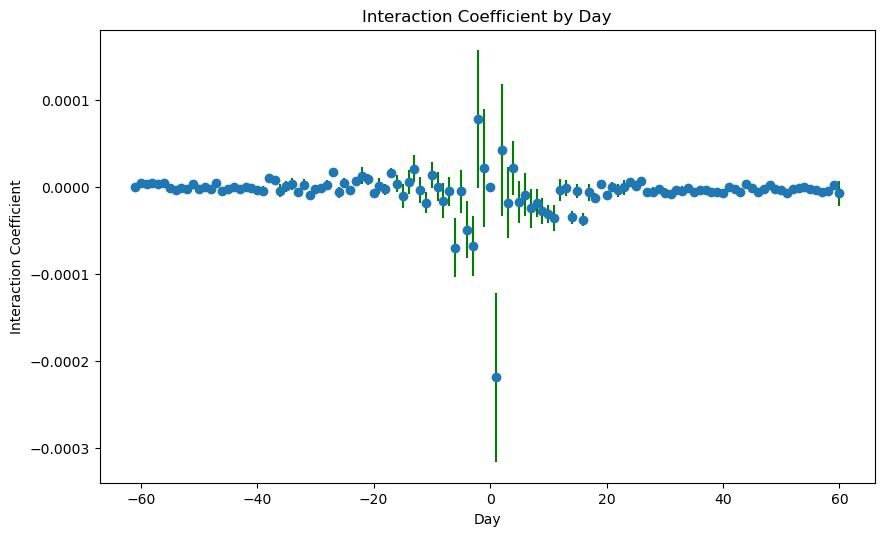

In [37]:
regression_coeffs = []
coefficients_std = []

# Loop over each week and run the regression
for day in range(min(diff_in_diff['day']), max(diff_in_diff['day']) + 1):
    
    diff_in_diff_day = diff_in_diff[diff_in_diff['day'] == day]
    
    model = smf.ols(formula='pedestrianDeath ~ treatment * day', data=diff_in_diff_day).fit()
    
    regression_coeffs.append(model.params)
    coefficients_std.append(model.bse)

# Convert lists of series to a DataFrame
coefficients_df = pd.DataFrame(regression_coeffs)
coefficients_std_df = pd.DataFrame(coefficients_std)

# Add 'week' to the DataFrames
coefficients_df['day'] = range(min(diff_in_diff['day']), max(diff_in_diff['day']) + 1)
coefficients_std_df['day'] = range(min(diff_in_diff['day']), max(diff_in_diff['day']) + 1)

plt.figure(figsize=(10, 6), dpi=100)
plt.errorbar(coefficients_df['day'], coefficients_df['treatment:day'],
             yerr=coefficients_std_df['treatment:day'], fmt='o', ecolor='g', capthick=2)
plt.xlabel('Day')
plt.ylabel('Interaction Coefficient')
plt.title('Interaction Coefficient by Day')
plt.show()

In [38]:
# TENTATIVA DE USAR O SKLEARN PRA RODAR A REGRESSAO AO INVES DO STATSMODELS


regression_coeffs = []
coefficients_std = []



# Loop over each week and run the regression
for day in range(min(diff_in_diff['day']), max(diff_in_diff['day']) + 1):
    
    diff_in_diff_day = diff_in_diff[diff_in_diff['day'] == day]
    
    # model = smf.ols(formula='pedestrianDeath ~ treatment * day', data=diff_in_diff_day).fit()
    model = LinearRegression().fit(diff_in_diff_day[['treatment', 'day', 'interaction']], diff_in_diff_day['pedestrianDeath'])
    
    regression_coeffs.append(model.coef_)  # model.intercept_, 
    coefficients_std.append(1e-3)  # model.bse

# Convert lists of series to a DataFrame
coefficients_df = pd.DataFrame(regression_coeffs)
coefficients_std_df = pd.DataFrame(coefficients_std)

# Add 'week' to the DataFrames
coefficients_df['day'] = range(min(diff_in_diff['day']), max(diff_in_diff['day']) + 1)
coefficients_std_df['day'] = range(min(diff_in_diff['day']), max(diff_in_diff['day']) + 1)

plt.figure(figsize=(10, 6), dpi=100)
plt.errorbar(coefficients_df['day'], coefficients_df['interaction'],
             yerr=1e-3, fmt='o', ecolor='g', capthick=2)
plt.xlabel('Day')
plt.ylabel('Interaction Coefficient')
plt.title('Interaction Coefficient by Day')
plt.show()

KeyError: 'interaction'

<Figure size 1000x600 with 0 Axes>

In [ ]:
diff_in_diff['time_to_treat'] = (diff_in_diff['datetime'] - pd.to_datetime('2021-06-01')).dt.days // 7
diff_in_diff['week'] = diff_in_diff['time_to_treat'] + 9
diff_in_diff

In [ ]:
regression_coeffs = []
coefficients_std = []

# Loop over each time_to_treat and run the regression
for time_to_treat in range(min(diff_in_diff['time_to_treat']), max(diff_in_diff['time_to_treat']) + 1):
    
    diff_in_diff_time_to_treat = diff_in_diff[diff_in_diff['time_to_treat'] == time_to_treat]
    
    
    
    model = smf.ols(formula='pedestrianDeath ~ treatment * time_to_treat', data=diff_in_diff_time_to_treat).fit()
    
    regression_coeffs.append(model.params)
    coefficients_std.append(model.bse)

# Convert lists of series to a DataFrame
coefficients_df = pd.DataFrame(regression_coeffs)
coefficients_std_df = pd.DataFrame(coefficients_std)

# Add 'time_to_treat' to the DataFrames
coefficients_df['time_to_treat'] = range(min(diff_in_diff['time_to_treat']), max(diff_in_diff['time_to_treat']) + 1)
coefficients_std_df['time_to_treat'] = range(min(diff_in_diff['time_to_treat']), max(diff_in_diff['time_to_treat']) + 1)

plt.figure(figsize=(10, 6), dpi=100)
plt.errorbar(coefficients_df['time_to_treat'], coefficients_df['treatment:time_to_treat'],
             yerr=coefficients_std_df['treatment:time_to_treat'], fmt='o', ecolor='g', capthick=2)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('time_to_treat')
plt.ylabel('Interaction Coefficient')
plt.title('Interaction Coefficient by Week')
plt.show()

In [ ]:
# diff_in_diff[(diff_in_diff['time_to_treat'] == -9) & (diff_in_diff['treatment'] == 1)]

diff_in_diff_time_to_treat_regr = diff_in_diff.groupby(['time_to_treat','treatment']).mean().reset_index()


diff_in_diff_time_to_treat_regr = diff_in_diff_time_to_treat_regr[diff_in_diff_time_to_treat_regr['time_to_treat'] != -1]
diff_in_diff_time_to_treat_regr


In [ ]:
regression_coeffs = []
coefficients_std = []

# Loop over each week and run the regression
for time_to_treat in range(min(diff_in_diff_time_to_treat_regr['time_to_treat']), max(diff_in_diff_time_to_treat_regr['time_to_treat']) + 1):
    
    if time_to_treat == -1:
        continue
    
    diff_in_diff_time_to_treat = diff_in_diff_time_to_treat_regr[diff_in_diff_time_to_treat_regr['time_to_treat'] == time_to_treat]
    
    model = smf.ols(formula='pedestrianDeath ~ treatment * time_to_treat', data=diff_in_diff_time_to_treat).fit()
    
    regression_coeffs.append(model.params)
    coefficients_std.append(model.bse)

# Convert lists of series to a DataFrame
coefficients_df = pd.DataFrame(regression_coeffs)
coefficients_std_df = pd.DataFrame(coefficients_std)


# # Add 'time_to_treat' to the DataFrames
coefficients_df['time_to_treat'] = diff_in_diff_time_to_treat_regr['time_to_treat'].unique()
coefficients_std_df['time_to_treat'] = diff_in_diff_time_to_treat_regr['time_to_treat'].unique()
print(coefficients_df)


plt.figure(figsize=(10, 6), dpi=100)
plt.errorbar(coefficients_df['time_to_treat'], coefficients_df['treatment:time_to_treat'],
             yerr=coefficients_std_df['treatment:time_to_treat'], fmt='o', ecolor='g', capthick=2)
plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('time_to_treat')
plt.ylabel('Interaction Coefficient')
plt.title('Interaction Coefficient by Week')
plt.show()



In [ ]:
df = pd.read_feather('dailyGrouping.feather')
df



In [ ]:
df['day'] = (df['date'] - pd.to_datetime('2021-06-01')).dt.days 
df = df[df['city'] == 1]
df

In [ ]:
regression_coeffs = []
coefficients_std = []

# Loop over each week and run the regression
for day in range(min(df['day']), max(df['day']) + 1):
    
    df_day = df[df['day'] == day]
    
    model = smf.ols(formula='pedestrianDeath ~ treated * day', data=df_day).fit()
    
    regression_coeffs.append(model.params)
    coefficients_std.append(model.bse)

# Convert lists of series to a DataFrame
coefficients_df = pd.DataFrame(regression_coeffs)
coefficients_std_df = pd.DataFrame(coefficients_std)

# Add 'week' to the DataFrames
coefficients_df['day'] = range(min(df['day']), max(df['day']) + 1)
coefficients_std_df['day'] = range(min(df['day']), max(df['day']) + 1)

plt.figure(figsize=(10, 6), dpi=100)
plt.errorbar(coefficients_df['day'], coefficients_df['treated:day'],
             yerr=coefficients_std_df['treated:day'], fmt='o', ecolor='g', capthick=2)
plt.xlabel('Day')
plt.ylabel('Interaction Coefficient')
plt.title('Interaction Coefficient by Day')
plt.show()

In [ ]:
diff_in_diff

In [ ]:
df = diff_in_diff.copy()
df

In [ ]:
df = (pd.get_dummies(df, columns=['time_to_treat'], prefix='INX')
      # Be sure not to include the minuses in the name
      .rename(columns=lambda x: x.replace('-', 'm'))
      # get_dummies has a `drop_first` argument, but if we want to
      # refer to a specific level, we should return all levels and
      # drop out reference column manually
      .drop(columns='INX_m1')
      # Set our individual and time (index) for our data
      .set_index(['station', 'week'])
)

df

In [ ]:
exog = df.columns[df.columns.str.contains('INX')]
endog = 'pedestrianDeath'

In [ ]:
df[exog]

In [ ]:
import linearmodels as lm

# model = lm.PanelOLS(df[endog], df[exog], entity_effects=True, time_effects=True)
# fit = model.fit(cov_type='clustered', cluster_entity=True)
# print(fit.summary)

model = lm.PanelOLS.from_formula(f'{endog} ~ {" + ".join(exog)} + EntityEffects + TimeEffects', data=df)
fit = model.fit(cov_type='clustered', cluster_entity=True)
print(fit.summary)